In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import pickle
from torchvision import datasets

In [2]:
def norm_img(im):
    m1 = im.min()
    m2 = im.max()    
    return (im - m1) / (m2 - m1)

# MNIST and MNIST-75sp

In [3]:
with open('data/mnist_75sp_test.pkl', 'rb') as f:
    test_labels, test_data = pickle.load(f)
with open('data/mnist_75sp_test_superpixels.pkl', 'rb') as f:
    superpixels = pickle.load(f)
print(len(test_labels), len(test_data), len(superpixels))
data = datasets.MNIST('./data', train=False, download=True)
images = data.test_data.numpy()
sz = images.shape
print(sz)

# Get ids of the first test sample for labels from 0 to 9
ind = []
labels_added = set()
for i, lbl in enumerate(test_labels):
    if lbl not in labels_added:
        ind.append(i)
        labels_added.add(lbl)
ind_sorted = []
for i in np.argsort(test_labels):
    if i in ind:
        ind_sorted.append(i)

10000 10000 10000
(10000, 28, 28)


# MNIST

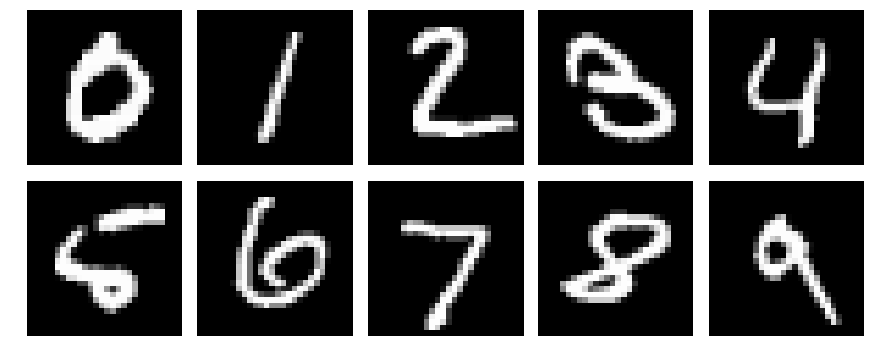

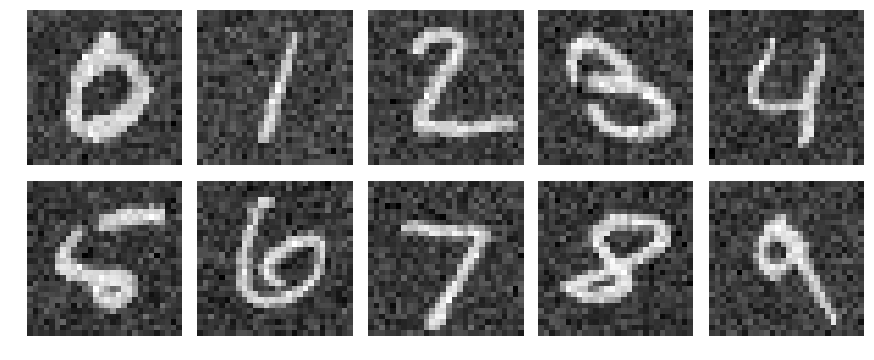

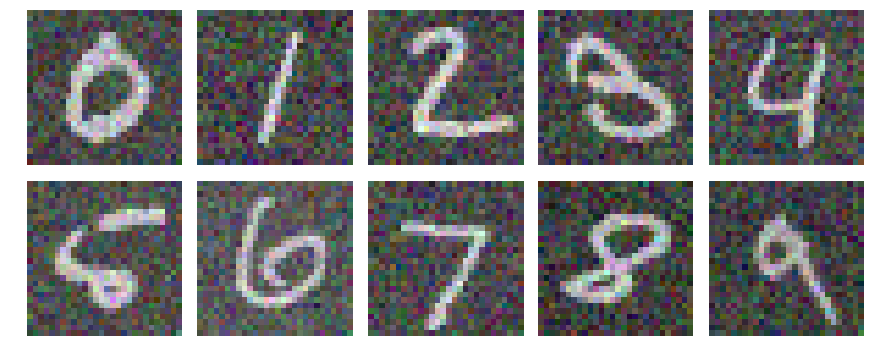

In [4]:
noises = torch.load('data/mnist_noise.pt').numpy().reshape(-1, sz[1], sz[2])
color_noises = torch.load('data/mnist_color_noise.pt').numpy().reshape(-1, sz[1], sz[2], 3)
noise_levels = [0.4, 0.6]
mn, sd = 0.13, 0.30  # mean, std values for pixel intensities computed for the mnist dataset

images_orig, images_noise, images_color_noise = [], [], []
for i in ind_sorted:
    img = (images[i] / 255. - mn) / sd
    images_orig.append(img)
    images_noise.append(img + noises[i] * noise_levels[0])
    images_color_noise.append(np.tile(img[:, :, None], (1, 1, 3)) + color_noises[i] * noise_levels[1])
    
for fig_id, img_set in enumerate([images_orig, images_noise, images_color_noise]):
    fig = plt.figure(figsize=(15, 6))
    n_cols = 5
    n_rows = 2 
    for i in range(n_rows):
        for j in range(n_cols):
            index = i*n_cols + j
            ax = fig.add_subplot(n_rows, n_cols, index + 1)
            if fig_id in [0, 1]:
                ax.imshow(img_set[index], cmap='gray')
            else:
                ax.imshow(norm_img(img_set[index]))
            ax.axis('off')
    plt.subplots_adjust(hspace=0.1, wspace=0.1)
    plt.show()

# MNIST-75sp

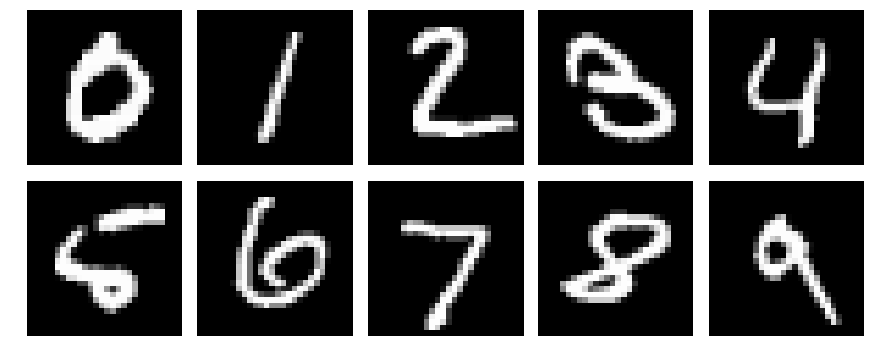

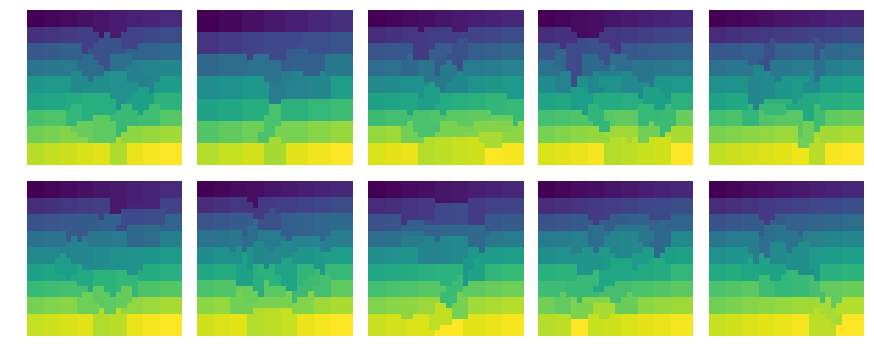

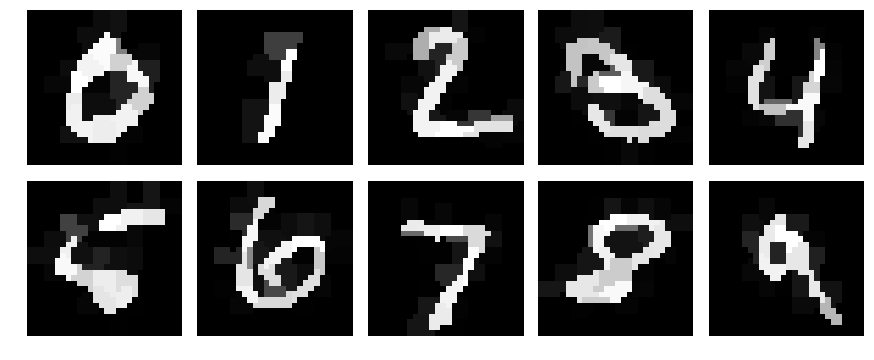

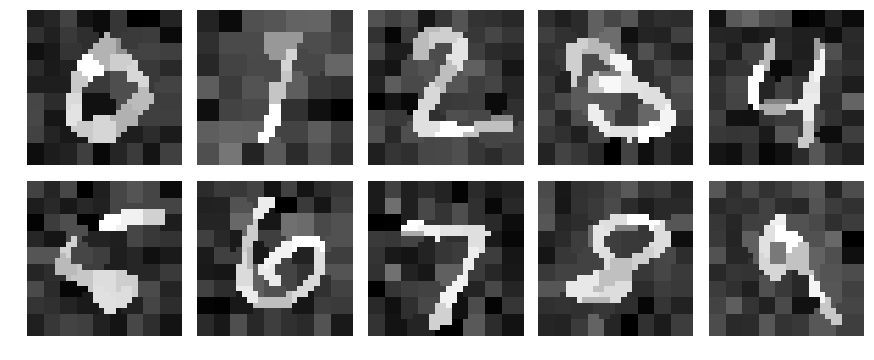

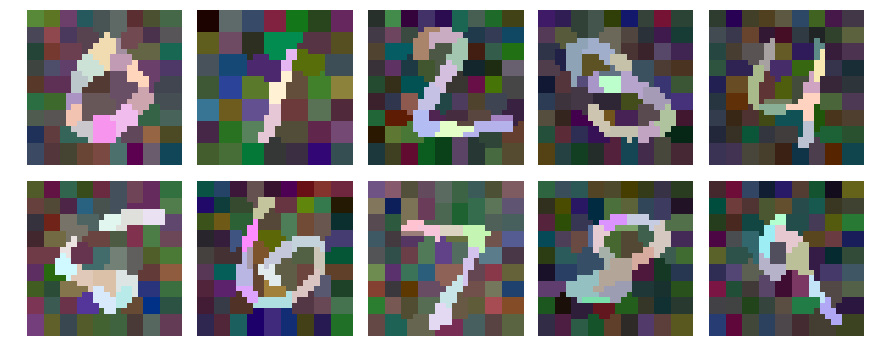

In [5]:
noises = torch.load('data/mnist_75sp_noise.pt').numpy()
color_noises = torch.load('data/mnist_75sp_color_noise.pt').numpy()
noise_levels = np.array([0.4, 0.6])
mn, sd = 0.11, 0.27  # mean, std values for superpixel intensities computed for the MNIST-75sp dataset

images_orig, images_sp_masks, images_sp, images_noise, images_color_noise = [], [], [], [], []
for i in ind_sorted:
    sp_intensity, sp_coord, sp_order = test_data[i]    
    n_sp = sp_intensity.shape[0]
    noise, color_noise = noises[i, :n_sp], color_noises[i, :n_sp]    
    # print(n_sp)
    img = np.zeros((sz[1], sz[1]))
    img_noise = np.zeros((sz[1], sz[1], 3))
    img_color_noise = np.zeros((sz[1], sz[1], 3))    
    for sp_intens, sp_index in zip(sp_intensity, sp_order):
        mask = superpixels[i] == sp_index
        img[mask] = (sp_intens - mn) / sd
        img_noise[mask] = (sp_intens - mn) / sd + noise[sp_index] * noise_levels[0]
        img_color_noise[mask] = (sp_intens - mn) / sd + color_noise[sp_index] * noise_levels[1]
    
    
    images_orig.append(images[i])
    images_sp_masks.append(superpixels[i])
    images_sp.append(img)
    images_noise.append(img_noise)
    images_color_noise.append(img_color_noise)

for fig_id, img_set in enumerate([images_orig, images_sp_masks, images_sp, images_noise, images_color_noise]):
    fig = plt.figure(figsize=(15, 6))
    n_cols = 5
    n_rows = 2 
    for i in range(n_rows):
        for j in range(n_cols):
            index = i*n_cols + j
            ax = fig.add_subplot(n_rows, n_cols, index + 1)
            if fig_id in [0, 2]:
                ax.imshow(img_set[index], cmap='gray')
            else:
                ax.imshow(norm_img(img_set[index]))
            ax.axis('off')
    plt.subplots_adjust(hspace=0.1, wspace=0.1)
    plt.show()

# CIFAR-10-150sp

In [6]:
with open('data/cifar10_150sp_test.pkl', 'rb') as f:
    test_labels, test_data = pickle.load(f)
with open('data/cifar10_150sp_test_superpixels.pkl', 'rb') as f:
    superpixels = pickle.load(f)
print(len(test_labels), len(test_data), len(superpixels))
data = datasets.CIFAR10('./data', train=False, download=True)
images = data.test_data
sz = images.shape
print(sz)

10000 10000 10000
Files already downloaded and verified
(10000, 32, 32, 3)


In [7]:
ind = []
labels_added = set()
for i, lbl in enumerate(test_labels):
    if lbl not in labels_added:
        ind.append(i)
        labels_added.add(lbl)
ind_sorted = []
for i in np.argsort(test_labels):
    if i in ind:
        ind_sorted.append(i)

images_orig, images_sp_masks, images_sp = [], [], []
for i in ind_sorted:
    sp_intensity, sp_coord, sp_order = test_data[i]    
    n_sp = sp_intensity.shape[0]
    noise, color_noise = noises[i, :n_sp], color_noises[i, :n_sp]    
    # print(n_sp)
    img = np.zeros((sz[1], sz[1], 3))
    for sp_intens, sp_index in zip(sp_intensity, sp_order):
        mask = superpixels[i] == sp_index
        img[mask] = sp_intens
    
    images_orig.append(images[i])
    images_sp_masks.append(superpixels[i])
    images_sp.append(img)    

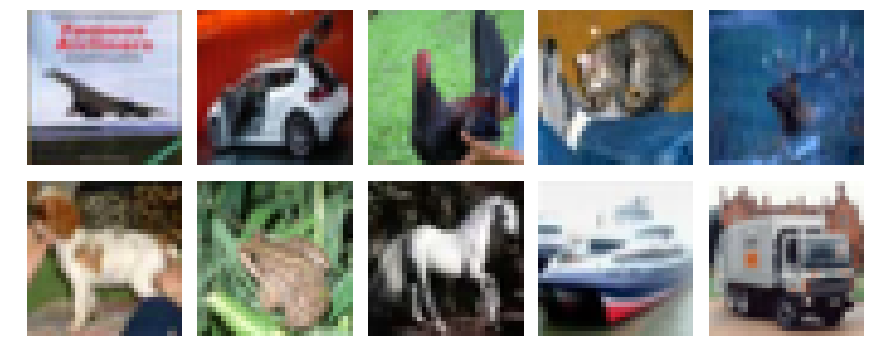

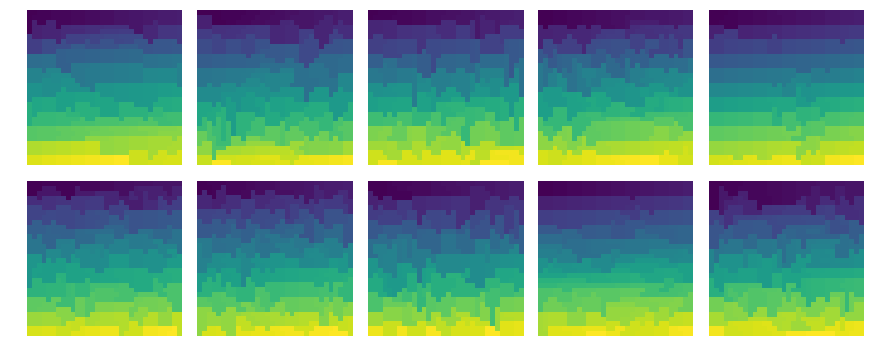

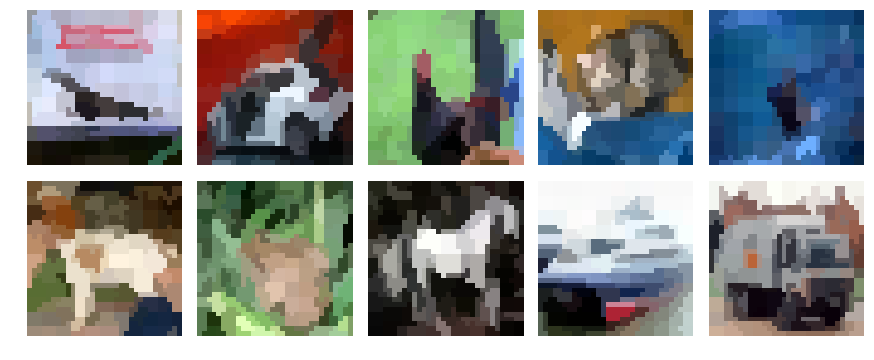

In [8]:
for fig_id, img_set in enumerate([images_orig, images_sp_masks, images_sp]):
    fig = plt.figure(figsize=(15, 6))
    n_cols = 5
    n_rows = 2 
    for i in range(n_rows):
        for j in range(n_cols):
            index = i*n_cols + j
            ax = fig.add_subplot(n_rows, n_cols, index + 1)            
            ax.imshow(norm_img(img_set[index]))
            ax.axis('off')
    plt.subplots_adjust(hspace=0.1, wspace=0.1)
    plt.show()